In [1]:
import pandas as pd
import numpy as np          
from scipy import stats     ## statistical functions 
import seaborn as sn        ## statistical data vis
import matplotlib.pyplot as plt ## vis


## Reading in the files 
ccdate = pd.read_csv("CCDate2018-2021.csv")
users = pd.read_csv("Users2021.csv")
conditions = pd.read_csv("CustomerMedicalConditions04Nov21.csv")



## Introduction

The project data is taken from a service called CleverCogs, a customisable entertainment and services system provided by Blackwood in its accommodation and externally. Blackwood provides housing and care to people with disabilities and other specific housing needs. Through a tablet device, CleverCogs allows residents to access the internet and entertainment, but also specific services offered by Blackwood such as care notes or assistance. 

The aim of this project is to look for correlations between the type of content that users access, and their age, location and condition etc. This might allow Blackwood to present users with activities that others with similar demographics have enjoyed, or offer suggested links.I am initially focusing on the link titles and categories as my starting point. 




## Describe (summary) 

Please see annotated code below to see answers for these questions.  

**○ what is the general type of the data (tabular, network, geographical, textual etc.)?**

**○ how large and complex is it (rows/columns, size, variation, structure)?**

**○ What fields and data types are present (max/min, levels for categorical values)?**

**○ Links between this data and other data (e.g. foreign keys, unique ids)?**

**○ Summary statistics about the data - how many people, what time frame, field averages etc.?**
 

 
**○ How does the data relate to the questions that the data owner has discussed with you?**

The data owner would like to look at correlations between user demographics and the content they engage with. We have information on age, gender, location and entertainment/internet access which is time and date stamped, along with the conditions/reason for residency of many of the individuals. We are looking for any kind of relationship that explains how and why residents use CleverCogs, but we are also looking for demographic correlations with usage. 

**CCDate** 

My first step is to take a brief look at each of the three files provided using df.info to print a summary of the dataframe. 

File ccdate contains 654,915 content links accessed by users. Data fields  are 'Time', 'VisitorID', 'ExternalID', 'Role', 'Location', 'Link Title', 'Link  Type', 'ContentInfo', and 'URL'. All fields are 'object' type except ExternalID, which is read in as 'float' due to the formatting. 

Links are assigned a label in column 'Link Type', which is simply a descriptive label for the link. 

The data spans from the 1st January 2018-1st November 2021. 

The external ID is the field used to link across the datasets we have been given. Only 540837 out of 654915 entries have an associated external ID - we will not be able to use the link data without one. We have been told by the data owner that this is usually a shared device, where data cannot be linked to an individual user. This data will have to be removed when analysing relationships between the users and the content. I check the number of external IDs which actually appear in this dataset. Only 544 different users are contained within this dataset. 

Every row in this file refers to a single link clicked by a user. A check for duplicates returns 58226 duplicated rows. The timestamps are only accurate to the minute, so if a used has clicked within a service twice in the same minute, this would produce an identical row entry. It will be important to decide what to do about these duplicates - for example, do multiple links clicked on Facebook during the same minute count as separate 'uses' of the service? Someone who jumps from page to page within the same service will skew the results more than someone who stays on the page for an extended period of time. Some services by their nature also encourage mutiple 'uses' or clicks, while others, for example videos or TV, would require less clicks. For now, I have chosen to remove these duplicates from the dataset,  but it might be interesting to look for differences in usage types during deeper exploratory analysis later in the project. 





In [2]:
### df.info will print summary of dataframe including datatype and non-null values. This will show me the scale of the data and also 
### if there are any missing/null values. 
print(ccdate.info())


print('-----------------------------------------')

## counting the number of external IDs which appear in the dataset. 
usercount = ccdate['ExternalID'].value_counts()
print(usercount)


print('------------------------------------------')
## shows first occurence of identical duplicate rows of data and saves as variable.
duplicates = ccdate[ccdate.duplicated()] 
print(duplicates)

## removes duplicates 
ccdate = ccdate.drop_duplicates()

print('------------------------------------------')

print (ccdate.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654915 entries, 0 to 654914
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         654915 non-null  object 
 1   VisitorID    654915 non-null  object 
 2   ExternalID   540837 non-null  float64
 3   Role         653868 non-null  object 
 4   Location     640252 non-null  object 
 5   Link Title   654915 non-null  object 
 6   Link  Type   654915 non-null  object 
 7   ContentInfo  24103 non-null   object 
 8   URL          324089 non-null  object 
dtypes: float64(1), object(8)
memory usage: 45.0+ MB
None
-----------------------------------------
5535.0    60350
9533.0    33029
5325.0    33009
5207.0    30780
4763.0    26160
          ...  
8920.0        1
7903.0        1
6293.0        1
8431.0        1
8353.0        1
Name: ExternalID, Length: 554, dtype: int64
------------------------------------------
                   Time                             Vi

File 'users' contains information on users of the CleverCogs service. Data fields are 'UserID', 'VisitorID', 'ExternalID', Birth date', 'Gender' and 'Location'. All fields are 'object' type except UserID and ExternalID, which are read in as 'float' and 'int' values.

The external ID column contains only 2644 non-null values out of a potienal 3641 entries. Again, we have been informed by the data host that null External IDs correspond to a shared device, meaning that the data cannot be used for our purposes as it can't be linked to an individual user. These will need to be removed. Therefore, we should have a sample size of 2644 users - however, only 554 of them actually have recorded link access data. 

No whole-row duplicates are present in the data. 

In [3]:
## Print summary of DF
print(users.info())
print(' -----------------------------------------')


##shows first occurence of identical duplicate rows of data and assigns as variable for further analysis 
duplicates = users[users.duplicated()] 
print(duplicates)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3641 entries, 0 to 3640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User ID     3641 non-null   int64  
 1   VisitorID   3641 non-null   object 
 2   ExternalID  2664 non-null   float64
 3   Birth date  1679 non-null   object 
 4   Gender      3641 non-null   object 
 5   Location    3024 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 170.8+ KB
None
 -----------------------------------------
Empty DataFrame
Columns: [User ID, VisitorID, ExternalID, Birth date, Gender, Location]
Index: []


File 'conditions' contains information on 1311 individual users of the CleverCogs service. These users are included in the 'users' file but not everyone has an entry in the 'conditions' file. Data fields are 'ExternalID', 'CleverCogs User ID', 'Gender', 'Date of Birth', 'Age', 'Staff Plan Conditions' and 'Care Sys Conditions'. All fields are 'object' type except UserID and ExternalID, which are read in as 'float' and 'int' values. No whole-row duplicates are present. 

I see here that the data type of the External ID column differs between files, which will need to be corrected before merging. 



In [4]:
## summary
print(conditions.info())
print('-----------------------------------------')

##shows first occurence of identical duplicate rows of data and assigns as variable for further analysis 
duplicates = conditions[conditions.duplicated()] 
print(duplicates)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   External ID          1311 non-null   object 
 1   CleverCogsUserId     1311 non-null   int64  
 2   Gender               1311 non-null   object 
 3   DateOfBirth          1310 non-null   object 
 4   Age                  1310 non-null   float64
 5   StaffPlanConditions  150 non-null    object 
 6   CareSysCondition     978 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 71.8+ KB
None
-----------------------------------------
Empty DataFrame
Columns: [External ID, CleverCogsUserId, Gender, DateOfBirth, Age, StaffPlanConditions, CareSysCondition]
Index: []


Here, I have merged the user and condition data into one file containing demographic information, and I have also created a master file which matches the demographic data with every link accessed in the ccdate file. This means that all of the data is easily accessible in one place for further analysis, but I still have access to the individual files in their original format. 

In [5]:
##renaming columns - the column names need to match if I want to merge using them as a reference point. 
conditions = conditions.rename(columns={"External ID": "ExternalID"}) 

## Removing rows with null values in External ID 
## Unless we have an external ID, these individuals cannot be accurately linked to their activity, so this data must be excluded
## It is also not possible to merge a dataset using a column with null values.
conditions = conditions.dropna(subset=["ExternalID"])
users = users.dropna(subset = ['ExternalID'])

## Changing the type of the data to numeric and setting non-viable values to NaN - if we want to merge based on the same ID column across two datasets, it must 
## be in the same format. 
conditions['ExternalID'] = pd.to_numeric(conditions['ExternalID'],errors = 'coerce')
users['ExternalID'] = pd.to_numeric(users['ExternalID'],errors = 'coerce')


## Merging the two files together using the external ID, creating one file with all demographic data 
userinfo = pd.merge(users, conditions, on= "ExternalID", how = 'left') 


## merging the demographic file with the ccdate file to create a master sheet of all data.
## merge data 
master = pd.merge(userinfo, ccdate, left_on="ExternalID", right_on="ExternalID", how = 'right')

print(master)


        User ID                           VisitorID_x  ExternalID  \
0         609.0  A81B2A0C-7638-4756-A44C-AA4592FA7BD6      5325.0   
1         609.0  A81B2A0C-7638-4756-A44C-AA4592FA7BD6      5325.0   
2        4859.0  0F135CC1-E809-4C1F-8E6F-BD861288920D      8899.0   
3        4859.0  0F135CC1-E809-4C1F-8E6F-BD861288920D      8899.0   
4         609.0  A81B2A0C-7638-4756-A44C-AA4592FA7BD6      5325.0   
...         ...                                   ...         ...   
645014    893.0  D6A8031B-C0E2-492E-87DD-DFC07BBD178E      5055.0   
645015    893.0  D6A8031B-C0E2-492E-87DD-DFC07BBD178E      5055.0   
645016    893.0  D6A8031B-C0E2-492E-87DD-DFC07BBD178E      5055.0   
645017    893.0  D6A8031B-C0E2-492E-87DD-DFC07BBD178E      5055.0   
645018    893.0  D6A8031B-C0E2-492E-87DD-DFC07BBD178E      5055.0   

               Birth date Gender_x  \
0                     NaN   Female   
1                     NaN   Female   
2        5/26/63 12:00 AM     Male   
3        5/26/63 12

Looking at the summary of the master dataset, I can see that several fields contain null values, but that everything has successfully merged and we have the expected number of entries. Depending on what aspect of the data is being analysed, I don't always have to exclude fields null values - for example, if I'm looking at links accessed but not interested in age, I wouldn't need to exclude fields without ages. This will depend on the type and direction of the analyses we decide to do for the final project.  

Some columns have duplicated, such as gender and location. These columns may contain non-overlapping information, so I want to merge these individual columns too. However, it looks like there is no info missing from Gender_x that is present in Gender_y, so I simply remove the extra column. There is different data present for location in both columns, so I check that this has been carried over to column Gender_x and then delete column Gender_y. 

I also rename the columns for ease of use, and then remove extraneous ID fields. The only universal ID is the External ID so the others are not required. 

In [6]:
print(master.info())

## filling/combining information from duplicated columns 
master['Gender_x'] = master['Gender_x'].fillna(master['Gender_y'])
master['Location_x'] = master['Location_x'].fillna(master['Location_y'])


## renaming columns for ease of use 
master = master.rename(columns={"Birth date": "Birth",
                                "Gender_x": "Gender", 
                                "Location_x":"Location", 
                                "ExternalID":"ID", 
                                "StaffPlanConditions":"Staffcons", 
                                "CareSysCondition":"Carecons", 
                                "Link Title":"Linktitle",
                                "Link  Type": "Linktype"})

## choosing to remove extraneous ID fields
master = master.drop(columns = ['VisitorID_x', 'VisitorID_y','CleverCogsUserId','Gender_y','Location_y','User ID'])



<class 'pandas.core.frame.DataFrame'>
Int64Index: 645019 entries, 0 to 645018
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User ID              542418 non-null  float64
 1   VisitorID_x          542418 non-null  object 
 2   ExternalID           542418 non-null  float64
 3   Birth date           356256 non-null  object 
 4   Gender_x             542418 non-null  object 
 5   Location_x           534007 non-null  object 
 6   CleverCogsUserId     436408 non-null  float64
 7   Gender_y             436408 non-null  object 
 8   DateOfBirth          436408 non-null  object 
 9   Age                  436408 non-null  float64
 10  StaffPlanConditions  126876 non-null  object 
 11  CareSysCondition     340607 non-null  object 
 12  Time                 645019 non-null  object 
 13  VisitorID_y          645019 non-null  object 
 14  Role                 644171 non-null  object 
 15  Location_y       

I check the final number of different users who have recorded usage information. We only have 554 users out of a potential 3641 that actually have user data associated with their ID, and not everyone has a condition associated with their user profile. As not all users have a recorded condition, the chances of determining robust connections between user conditions and their accessed content is low, but we may be able to show relationships based on other deomographics.   

In [7]:
## checking changes 
print(master.info())

usercount = master['ID'].value_counts()
print(usercount)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645019 entries, 0 to 645018
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           542418 non-null  float64
 1   Birth        356256 non-null  object 
 2   Gender       542418 non-null  object 
 3   Location     632033 non-null  object 
 4   DateOfBirth  436408 non-null  object 
 5   Age          436408 non-null  float64
 6   Staffcons    126876 non-null  object 
 7   Carecons     340607 non-null  object 
 8   Time         645019 non-null  object 
 9   Role         644171 non-null  object 
 10  Linktitle    645019 non-null  object 
 11  Linktype     645019 non-null  object 
 12  ContentInfo  22498 non-null   object 
 13  URL          325062 non-null  object 
dtypes: float64(2), object(12)
memory usage: 73.8+ MB
None
5535.0    56744
5325.0    30826
9533.0    29760
5207.0    29436
9137.0    28196
          ...  
7903.0        1
6293.0        1
8431.0        

## Explore ## 

Carry out a deeper exploration of the data. This includes looking at individual
fields/variables to see the distribution of values they take (e.g. evenly distributed, bell curves, bi-modal) or how they are distributed in time. It also includes relationships between variables in your dataset: are there correlations? In which direction? Complex curves? 

We would expect to see roughly:

○ 4-5 exploratory visualisations, presented in a readable form, with an explanation about what you have found

○ 1-2 relationships between variables analysed

○ Ideas about trends, outliers, clusters

○ Reference to statistics, i.e. a sense of which relationships are significant, and what claims you can back up

I wanted to look at the types and numbers of conditions/reasons for residency that Blackwood caters to, and which were most common in our dataset. I removed users with no specified care condition from my userinfo dataframe, then matched up the ID with the data from the master sheet to filter out any individuals with no usage data. 

The most commonly listed reason for residency is elderly care support. I was hoping that some of these conditions could be grouped for analysis, for example asthma and COPD could be combined under 'Respiratory Issues', but I am wary of reclassifying our data in that way without expertise. It may be possible that users with specific listed conditions show a group preference for certain types of content. 

Text(0, 0.5, 'Number of Users')

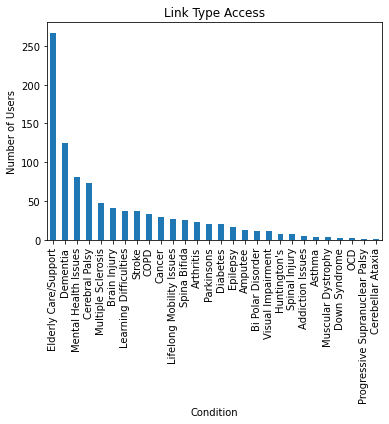

In [8]:
#strips white space out of text 
userinfo['CareSysCondition'] = userinfo['CareSysCondition'].str.strip()  

#drops null values 
userinfo = userinfo.dropna(subset=["CareSysCondition"])

## creates list of rows from userinfo where the external ID is also present in master 
infomatch = master["ID"].isin(userinfo["ExternalID"])

## creates new frame with only rows from userinfo where external ID is present in master 
userinfocut = userinfo.loc[infomatch, :]

#counts number of occurences 
cons = userinfo["CareSysCondition"].value_counts()

##plots bar chart 

chart = cons.plot(y='number', kind='bar', title='Link Type Access')   
chart.set_xlabel("Condition")
chart.set_ylabel("Number of Users")

I first had a look at the distribution of our users ages. Age is often an important factor in uptake of new devices or technology, so I wondered if there was any relationship between resident age and frequency of use. The mean age is 60 (SD = 14). There is a wide range of ages as expected, given the many different conditions that Blackwood accommodates for. 

I notice some age outliers - there are multiple infants, and Blackwood does not provide services for infants. There are also multiple users with a recorded age of over 120 which given the average life expectancy seems very unlikely. These are likely to be errors in recording and should be excluded for any analysis by age group. For convenience in future analysis I create a new variable containing only the desired ages. 

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


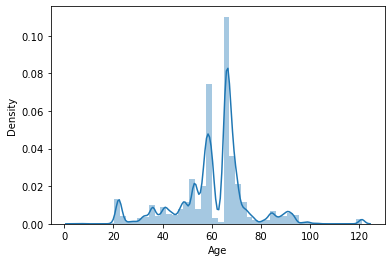

In [9]:
ax = sn.distplot(master['Age']) 

                  ID            Age
count  433406.000000  433406.000000
mean     6688.155711      60.279728
std      1665.925899      14.410252
min      4703.000000      20.000000
25%      5341.000000      54.000000
50%      5542.000000      65.000000
75%      8643.000000      67.000000
max      9594.000000     103.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 433406 entries, 2 to 645018
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           433406 non-null  float64
 1   Birth        322308 non-null  object 
 2   Gender       433406 non-null  object 
 3   Location     425898 non-null  object 
 4   DateOfBirth  433406 non-null  object 
 5   Age          433406 non-null  float64
 6   Staffcons    126876 non-null  object 
 7   Carecons     340547 non-null  object 
 8   Time         433406 non-null  object 
 9   Role         433406 non-null  object 
 10  Linktitle    433406 non-null  object 
 11  L

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


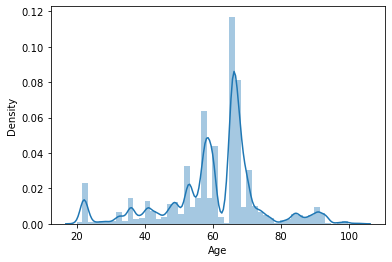

In [10]:
## Removing age outliers 


## Removes ages over 120 
agecut = master[master["Age"] <= 120]

## Removes ages under 10
agecut = agecut[agecut["Age"] >= 18]
print(agecut.describe())
print(agecut.info())

## replots age distribution
ax = sn.distplot(agecut['Age']) 




To see the relationship between age and use frequency, I plotted the cleaned ages of each user against the number of links they accessed. The users who access the greatest number of links are in their 50s-60s. There does not appear to be a clear-cut relationship between age and useage frequency. 

This scatter plot does also show again that not many users are generating most of the link data through very frequent usage in comparison to other residents. 

I also separated the plot of use frequency vs age by gender, but at least in this larger overview there does not seem to be a clear trend of either gender having much greater usage frequency. In this case it's also hard to see the true scale of the usage because a handful of users have very high usage frequencies - they may need to be removed from deeper analysis. 



Text(0, 0.5, 'Overall Usage')

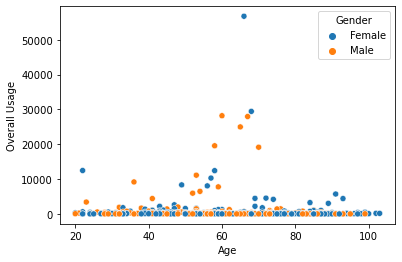

In [11]:
## counts the number of links accessed by each user 

##creates new dataframe with ID and link counts 
usercount = agecut['ID'].value_counts().rename_axis('ID').reset_index(name='counts')


## adds cleaned age data to the usercount dataframe 
usercount = usercount.merge(agecut[['ID', 'Age','Gender']], left_on='ID', right_on='ID')
usercount = usercount.drop_duplicates()

## sets variables for plotting 
x = usercount['Age']
y = usercount['counts']

sn.scatterplot(x = "Age", y = "counts", hue = "Gender", data= usercount)

plt.xlabel("Age")
plt.ylabel("Overall Usage")




Text(0, 0.5, 'Overall Usage')

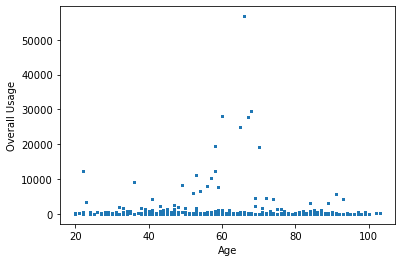

In [12]:
usercount = usercount.merge(agecut[['ID','Gender']], left_on='ID', right_on='ID')

## sets variables for plotting 
x = usercount['Age']
y = usercount['counts']


## plots chart 
chart = plt.scatter(x, y, s=3)
plt.xlabel("Age")
plt.ylabel("Overall Usage")


I thought it might also be interesting to see if different links are accessed at different times. To do this, I first looked at normal distribution of usage over time. I created a separate column which contains only the hour portion of the date and time data, then plotted links accessed per hour as a bar chart. This shows that usage drops during the night, which is expected, but is still ongoing. This could potentially be used as an indicator of poor sleep or nighttime disturbances. Usage then increases substantially during the day, with slight decreases which seem to correspond to mealtimes. The highest daily usage appears to happen around 3pm. 

Ideally I would want to calculate the mean links accessed per hour for every day and use these values instead for a more accurate idea - this is something I will take forward to the second half of the project. 

In [13]:
from datetime import datetime
## creating new column and converting our date and time info to datetime objects
master['DateTime'] = pd.to_datetime(master['Time']) 

## Separating the date and time information into two different columns 
master['Date'] = master['DateTime'].dt.strftime('%d/%m/%Y')
master['Time'] = master['DateTime'].dt.strftime('%H:%M:%S')

## print to check success 
print(master['Date'])
print(master['Time'])

0         01/11/2021
1         01/11/2021
2         01/11/2021
3         01/11/2021
4         01/11/2021
             ...    
645014    01/01/2018
645015    01/01/2018
645016    01/01/2018
645017    01/01/2018
645018    01/01/2018
Name: Date, Length: 645019, dtype: object
0         17:10:00
1         17:10:00
2         17:08:00
3         17:08:00
4         17:07:00
            ...   
645014    00:46:00
645015    00:46:00
645016    00:29:00
645017    00:20:00
645018    00:20:00
Name: Time, Length: 645019, dtype: object


Text(0, 0.5, 'No. Links Accessed')

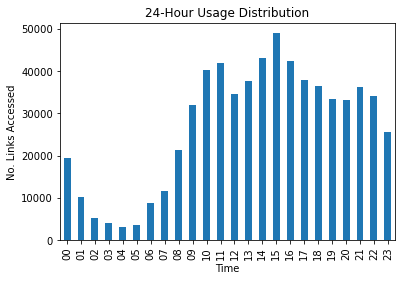

In [14]:
## creating a new column which contains only the hour of the date and time data, acting as a 'bin'. 
master['hours'] = master['DateTime'].dt.strftime('%H')

## counts links accessed during each hour 
x = master['hours'].value_counts()

## sorts hours for plotting 
x = x.sort_index()

## plots chart. 
chart = x.plot(y='number', kind='bar', title='24-Hour Usage Distribution')   
chart.set_xlabel("Time")
chart.set_ylabel("No. Links Accessed")


I also wondered if this distribution over time was different for different types of content or for different links. For example, is radio accessed more often during the night to help people sleep, or is it more likely to be used during the morning? To do this I would need to understand more about the content being accessed. 

The most used links are Entertainment, Google and My Interests. However, this doesn't mean a lot without separating the content by link type first- two of the top three items are category types, meaning they are part of the internal organisation of the device and not 'content' in their own right. 


In [15]:
master['Linktitle'].value_counts()


Entertainment                 79410
Google                        33985
My Interests                  33258
YouTube                       28299
My Music                      24055
                              ...  
Free Tarot Readings               1
Clubland Classics                 1
Totenham Hotspur                  1
Google Earth - Italy              1
Broom Court Christmas Menu        1
Name: Linktitle, Length: 1666, dtype: int64

I then used value_counts to see which link types were most used, and then plotted this as a pie chart. By far, Category and Internet were the most commonly accessed link types. A pie chart is not the best way to view this - as the variation in usage is so huge, many of the types are not visible at all, so I replotted as a bar chart. Either way, we can see that internet links makes up the vast majority of content that individuals are accessing. I believe that breaking down this section will be the most useful in terms of understanding what content is popular.  


------------------------------------------------------
------------------------------------------------------


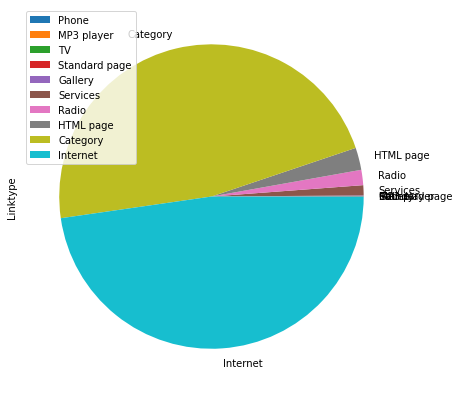

In [16]:
type = master['Linktype']
x = type.value_counts()

## Link titles are each tagged with a type. The most common is 'category', which corresponds to internal orgnanisation of services, 
## eg radio stations, my interests, my care.  There are ten link types: Category, Internet, HTML page, Radio,             
## Services, Gallery, Standard page, TV, MP3 player and Phone.
print('------------------------------------------------------')


# Set aspect ratio to be equal so that pie is drawn as a circle.
pie = x.sort_values().plot.pie(y = 'Linktype', figsize=(7,7))

plt.legend()
##Plot a chart to show the difference in categories used - almost 100% of links are either category or internet. 
##Might be interesting to analyse each category separately. 
print('------------------------------------------------------')




Text(0, 0.5, 'No. Links Accessed')

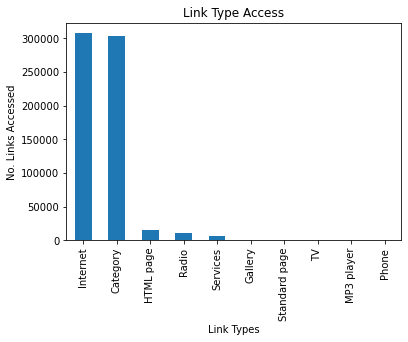

In [17]:
chart = x.plot(y='number', kind='bar', title='Link Type Access')   
chart.set_xlabel("Link Types")
chart.set_ylabel("No. Links Accessed")

Here, I have created separate variables for each type of link. This will make it easier to break down links in each type during the project. This also allows me to quickly get a better idea of the content being accessed and the range - for example, only 28 different radio stations are accessed vs 1477 different internet pages.

I am also able to see the most popular content. One interesting thing that stands out to me is the high access for 'Celtic FC' in the internet category, as this is a highly specific interest. I noticed this earlier when looking at age vs usage and wonder if there are 'superusers' who much more regularly use devices than others, which may be a problem for analysis and skew the results. This lines up with the output I got when checking the External ID value counts earlier - the top user had accessed 56744 links, while the next most prolific user had only accessed 30826. I want to visualise this as it may be an issue when trying to draw conclusions from the data. 





In [18]:
# creates a new df only containing rows where link type = category 
category = (master[master['Linktype']=='Category'])

# counts the different links used within that type 
catcount = category['Linktitle'].value_counts()
print(catcount)

print('---------------------------------------------------------')

internet = (master[master['Linktype']=='Internet'])
intcount = internet['Linktitle'].value_counts()
print(intcount)
print('---------------------------------------------------------')

html = (master[master['Linktype']=='HTML page'])
htmlcount = html['Linktitle'].value_counts()
print(htmlcount)

print('---------------------------------------------------------')

radio = (master[master['Linktype']=='Radio'])
radcount = radio['Linktitle'].value_counts()
print(radcount)
print('---------------------------------------------------------')

gallery = (master[master['Linktype']=='Gallery'])
galcount = gallery['Linktitle'].value_counts()
print(galcount)
print('---------------------------------------------------------')

services = (master[master['Linktype']=='Services'])
servcount = services['Linktitle'].value_counts()
print(servcount)
print('---------------------------------------------------------')

standard = (master[master['Linktype']=='Standard page'])
stancount = standard['Linktitle'].value_counts()
print(stancount)
print('---------------------------------------------------------')

mp3 = (master[master['Linktype']=='Internet'])
mp3count = internet['Linktitle'].value_counts()
print(mp3count)
print('---------------------------------------------------------')

tv = (master[master['Linktype']=='TV'])
tvcount = tv['Linktitle'].value_counts()
print(tvcount)
print('---------------------------------------------------------')

phone = (master[master['Linktype']=='Phone'])
phcount = phone['Linktitle'].value_counts()
print(phcount)

Entertainment                     79410
My Interests                      33258
My Music                          24055
Play Games                        23215
My Care                           23157
                                  ...  
Trucks and Tankers                    1
Toilet                                1
Bedrooms                              1
Hallway                               1
Local Information - Midlothian        1
Name: Linktitle, Length: 101, dtype: int64
---------------------------------------------------------
Google                        33985
YouTube                       28299
Card Matching Games           23492
Care Notes                    17188
Celtic FC                     11854
                              ...  
ALISS                             1
80s & 90s | Easy Listening        1
Edith Piaf                        1
Easy Listening Music 2            1
Broom Court Christmas Menu        1
Name: Linktitle, Length: 1477, dtype: int64
-------------------

Here I plot the number of links accessed by each user using value_counts. This presents an issue for analysis - over 10% of ID-linked content has been accessed by the same user, and if we extend this to the top 5 users they account for over 30% of the ID-linked content. Their heavy usage will skew any relationships we find between demographics and content accessed unless we find a way to account for it. It may be possible that we will have to exclude data from some users or find a way to weight the data equally. 

I also have not accounted for the time range in which users are active - some users may join the survey later in the time frame. This could be accounted for in later analysis by using daily mean link access rather than overall. 

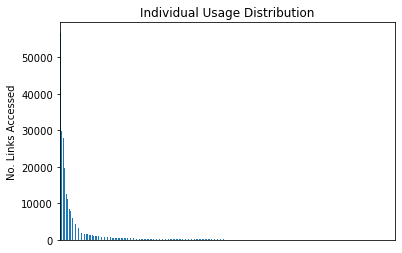

In [22]:

## plots usercount chart 
chart = usercount['counts'].plot(kind='bar', title='Individual Usage Distribution')   
chart.set_ylabel("No. Links Accessed")
chart.set_xlabel("User")

## hides x axis labels due to very high label density. 
chart.axes.get_xaxis().set_visible(False)

Since I broke down my link data by type I want to explore other relationships within that data. I started by plotting radio usage over time and found that use of radio also continued throughout the night as overall usage did, but did not follow the same distribution during the day. Instead, there was a peak in usage at 6am, and then around 9am, which steadily declined throughout the day. However YouTube usage follows the same standard usage pattern. There is a possibility of other services or specific links being popular at different times of day, so it will be interesting to delve into these and compare them. If Blackwoods wishes to offer customised content, they may benefit from making it time-specific as well. 

Text(0, 0.5, 'No. Radio Links Accessed')

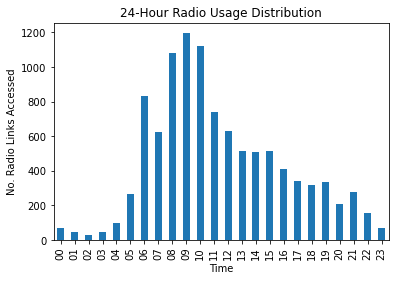

In [20]:
## creating a new column which contains only the hour of the date and time data, acting as a 'bin'. 
x = radio['hours'].value_counts()

## sorts hours for plotting 
x = x.sort_index()

## plots chart. 
chart = x.plot(y='number', kind='bar', title='24-Hour Radio Usage Distribution')   
chart.set_xlabel("Time")
chart.set_ylabel("No. Radio Links Accessed")

Text(0, 0.5, 'No. YouTube Links Accessed')

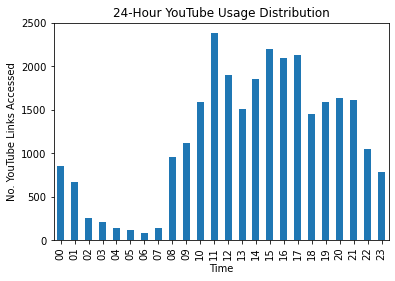

In [21]:
## creating a new column which contains only the hour of the date and time data, acting as a 'bin'. 
youtube = master[master['Linktitle'] == 'YouTube']

## sorts hours for plotting 
x = youtube['hours'].value_counts()
x = x.sort_index()

## plots chart. 
chart = x.plot(kind='bar', title='24-Hour YouTube Usage Distribution')   
chart.set_xlabel("Time")
chart.set_ylabel("No. YouTube Links Accessed")


## Reflect and Hypothesise: ## 
What do you think might be behind the relationships and
distributions that you have found? How does your data relate to the world?In short, what
hypotheses came up as you explored the data, and how would you go about testing them? We
would expect to see:

○ A 200 word reflection on the data

This user data reflects the lifestyles of the people living with Blackwood - their daily routines, wake, sleep and meal times, their preferred entertainment, their favourite football teams or the kind of music they like.  Understanding how people use CleverCogs will allow Blackwood to improve the system and offer a better user experience, potentially improving quality of life within Blackwood homes.

The dataset appeared very large at first glance - however, after cleaning, the true sample size is much smaller. I am beginning to understand the differences in working with data which has been gathered under experimental conditions for analysis, in comparison to 'real-world' data which is generated by users. We must be careful not to draw false conclusions based on low sample sizes, or samples skewed by individual users. I believe we will be able to analyse and present the data well, and draw out some useful relationships from it.  



○ 3-5 hypotheses with an explanation of:

    ■ What your hypothesis is
    
    ■ why you think that (referring to your graphs)
    
    ■ How you could go about testing it (note that this may include: further studies,
    asking the data owner, using some advanced algorithms, checking each data point individually, etc..)

NOTE: You don’t have to actually test the hypotheses - you just have to demonstrate that you have plausibly thought about how you would test them.

**Hypothesis**: Older residents either feel less confident in using CleverCogs, or have less interest in using it. 

I believe this because there is a clear trend towards lower usage in older age groups. However, this is not the full picture, as there is also a trend towards lower usage in younger residents, with a clear peak in usage from users in their 50s - 60s.

I would like to find out if residents also have their own devices, as perhaps younger users are more likely to use personal phones or laptops to access similar content and therefore use the CleverCogs system less. I should be able to get this information from the data owner.  


**Hypothesis**: Residents prefer to use the radio in the morning.

There is a peak in usage in the morning. This could just be a preference of having background noise and switching on the radio first thing, as there is no need to then interact with the system further, or they could also enjoy using the radio in the morning to help them wake up for the day. A survey or focus group with a set of users to explore why they use different services and what they get from them could provide more information on this. 

**Hypothesis**: Residents access CleverCogs during the night due to disturbed sleep, rather than actively choosing to stay awake. 

CleverCogs usage continues throughout the night. Several conditions listed can frequently cause disturbed sleep for different reasons. One example is arthritis, where increased pain is common during the night. There may be a difference in night usage depending on user condition, and it would also be interesting to offer an automated question/survey through CleverCogs to night-users to determine if they experienced adverse symptoms during the night. This may also yield information that leads to better care for these users.
